<a href="https://colab.research.google.com/github/pmccthy/ML-playground/blob/main/autoencoders/vanilla_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla autoencoder models**

**Model 1**

First simple autoencoder model based on the tutorial at https://blog.keras.io/building-autoencoders-in-keras.html

In [29]:
%matplotlib inline
import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

We will create a simple model comprised of three densely connected layers, where the middle layer has fewer nodes than the input input layer (forming the encoder), and the third layer has the same number of nodes as the input layer (forming the decoder)

In [55]:
# params
input_dim = 784
comp_factor = 100 # play around with the compression factor and see the effects on the reconstruction of input data
encoding_dim = input_dim//comp_factor 

In [56]:
# autoencoder model
input_sig = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_sig)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_sig, decoded)
autoencoder.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_23 (Dense)            (None, 7)                 5495      
                                                                 
 dense_24 (Dense)            (None, 784)               6272      
                                                                 
Total params: 11,767
Trainable params: 11,767
Non-trainable params: 0
_________________________________________________________________


In [57]:
# encoder model
encoder = keras.Model(input_sig, encoded)

In [58]:
# decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

we will use the binary cross-entropy loss function, a good explanation of which can be found here: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [59]:
# compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

we will train the model to reconstruct MNIST images

In [60]:
# load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# normalise valus between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# flatten
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [61]:
# train model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3434 - val_loss: 0.2589
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2363 - val_loss: 0.2143
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2038 - val_loss: 0.1944
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1923 - val_loss: 0.1882
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1880 - val_loss: 0.1851
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1854 - val_loss: 0.1829
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1835 - val_loss: 0.1813
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1819 - val_loss: 0.1797
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1806 - val_loss: 0.1785
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1794 - val_lo

In [62]:
# encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

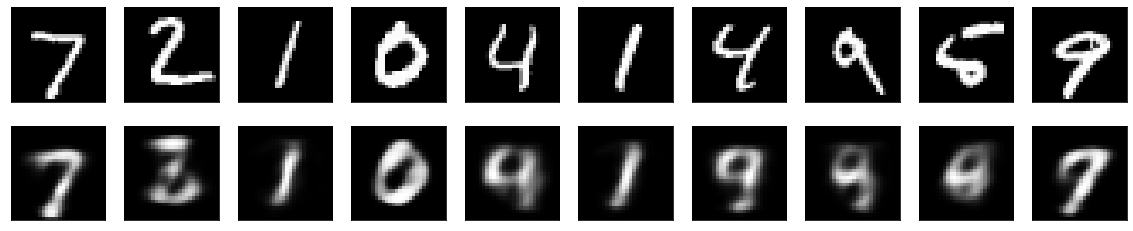

In [63]:
n = 10  # number of digits to disply
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()